In [99]:
import numpy as np
import pickle as pkl
from os.path import join
import torch
import matplotlib.pyplot as plt
import importlib
from sklearn.manifold import TSNE
from patbert.features import embeddings 
importlib.reload(embeddings)
import string


In [37]:
vocab = torch.load(join('..','data', 'vocabs', 'simulated.pt'))
top_lvl_vocab = torch.load(join('..','data', 'vocabs', 'simulated_top_lvl.pt'))
token2top_lvl = torch.load(join('..','data', 'vocabs', 'simulated_token2top_lvl.pt'))

In [38]:
top_lvl_vocab

{'<CLS>': 0,
 '<PAD>': 1,
 '<SEP>': 2,
 '<MASK>': 3,
 '<UNK>': 4,
 '<MALE>': 5,
 '<FEMALE>': 6,
 '<BIRTHYEAR>': 7,
 '<BIRTHMONTH>': 8,
 'L': 9,
 'D': 10,
 'M': 11}

In [78]:
embedding = embeddings.HierarchicalEmbedding(vocab, top_lvl_vocab, token2top_lvl, embedding_dim=2)
embedding.weight = torch.nn.Parameter(embedding.initialize_weights())

In [75]:
inv_vocab = {v: k for k, v in vocab.items()}

In [84]:
vecs = embedding(torch.tensor(np.arange(len(vocab))))
vecs = vecs.detach().numpy()
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_vec = tsne.fit_transform(vecs)

c:\Users\fjn197\Miniconda3\envs\patbert\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\fjn197\Miniconda3\envs\patbert\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [61]:
for token, idx in vocab.items():
    if token.startswith('M'):
        print(token, idx)

MV75U74 13
MN41W82 17
MI33X39 19
MW39W38 22
MS85K58 24
MD04J54 34
MZ61M61 49
MX60J90 54
MI26N17 55
MZ50U36 56
MP07B77 59
MJ08O79 65
MR46O17 66
MX12W10 73
MJ94I46 74
MJ11N36 75
MZ67Z48 81
ME36H34 85
MY18L90 88
MX76Z78 89
MD60G91 90
MO16K76 93
MO33R49 95
MC57K36 98
MB83I12 99
MF17U97 103
MV27D98 104
MS55H14 105
MN70O52 108
MP06O00 112
MI55M35 114
MK53T09 115
MJ81Z60 116
MO28V13 120
MO74V43 122
MH54M37 124
MK41P79 129
MU52Z06 138
MQ17V10 146
MI05U62 147
MC56D60 148
MO76J60 151
MC48Q40 153
MW78P14 156
MI34B86 158
MQ02X33 160
MV70L00 161
MH50E31 163
MG58C98 165
MH28B87 166
MM51A24 171
MD67E47 175
ME09H85 178
MR74U69 181
MB91D38 186
MW15G44 192
MY92S28 201
MP38O55 207
MW63U43 208
MM82C68 209
MK18B47 212
MJ85U10 213
MF27V29 216
MF86G70 227
MM16K24 236
MC45M49 239
MV27I56 240
MJ39Q65 241
MF01P20 243
ML35Q89 245
MJ08Y23 247
MB75J02 254
MZ41N96 256
MS04J72 261
MZ82J43 262
MS45I50 264
MW62Q37 265
MO61X48 270
ME24Q37 271
MJ28Z24 273
MZ71C57 276
MA96U60 277
MN16M67 279
MQ72Y63 283
MH89F75 284
MR01W

In [72]:
tsne_vec[19]

array([14.508245  ,  0.65034753], dtype=float32)

In [137]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
def add_zoom_inset(ax, zoom,loc, x,y, xlim, ylim , sy = None, 
                   xlabel = '', ylabel = '', label_fs = 18,
                   mark_inset_loc = (3,1), borderpad = 4,
                   bbox_to_anchor = None, bbox_transform = None):
    """Add inset axis that shows a region of the data.
    
    Parameters:
    -----------
    ax: axis object
    zoom: float, zoom factor
    loc: integer, location of inset axis
    x,y, sy: array_like, data to plot
    xlim, ylim: (float, float) limits for x and y axis
    xlabel, ylabel: str, label for x and y axis
    label_fs: float, fonstsize for x and y axis labels
    mark_inset_loc: (int, int), corners for connection to the new axis
    borderpad: float, distance from border
    """
    
    axins = zoomed_inset_axes(ax,zoom,loc = loc,
                              borderpad=borderpad, 
                             bbox_to_anchor=bbox_to_anchor,bbox_transform=bbox_transform) 
    if sy==None:
        axins.plot(x, y)
    else: 
        axins.errorbar(x, y, yerr=sy, fmt='.b',  ecolor='b', elinewidth=.5, 
             capsize=0, capthick=0.1)
        
    if not(ylim==None):
        axins.set_ylim(ylim)
    
    axins.set_xlabel(xlabel, fontsize = label_fs)
    axins.set_ylabel(ylabel, fontsize = label_fs)
    axins.set_xlim(xlim) # Limit the region for zoom
    mark_inset(ax, axins, loc1=mark_inset_loc[0], 
               loc2=mark_inset_loc[1], fc="none", ec="0.5")
    return axins

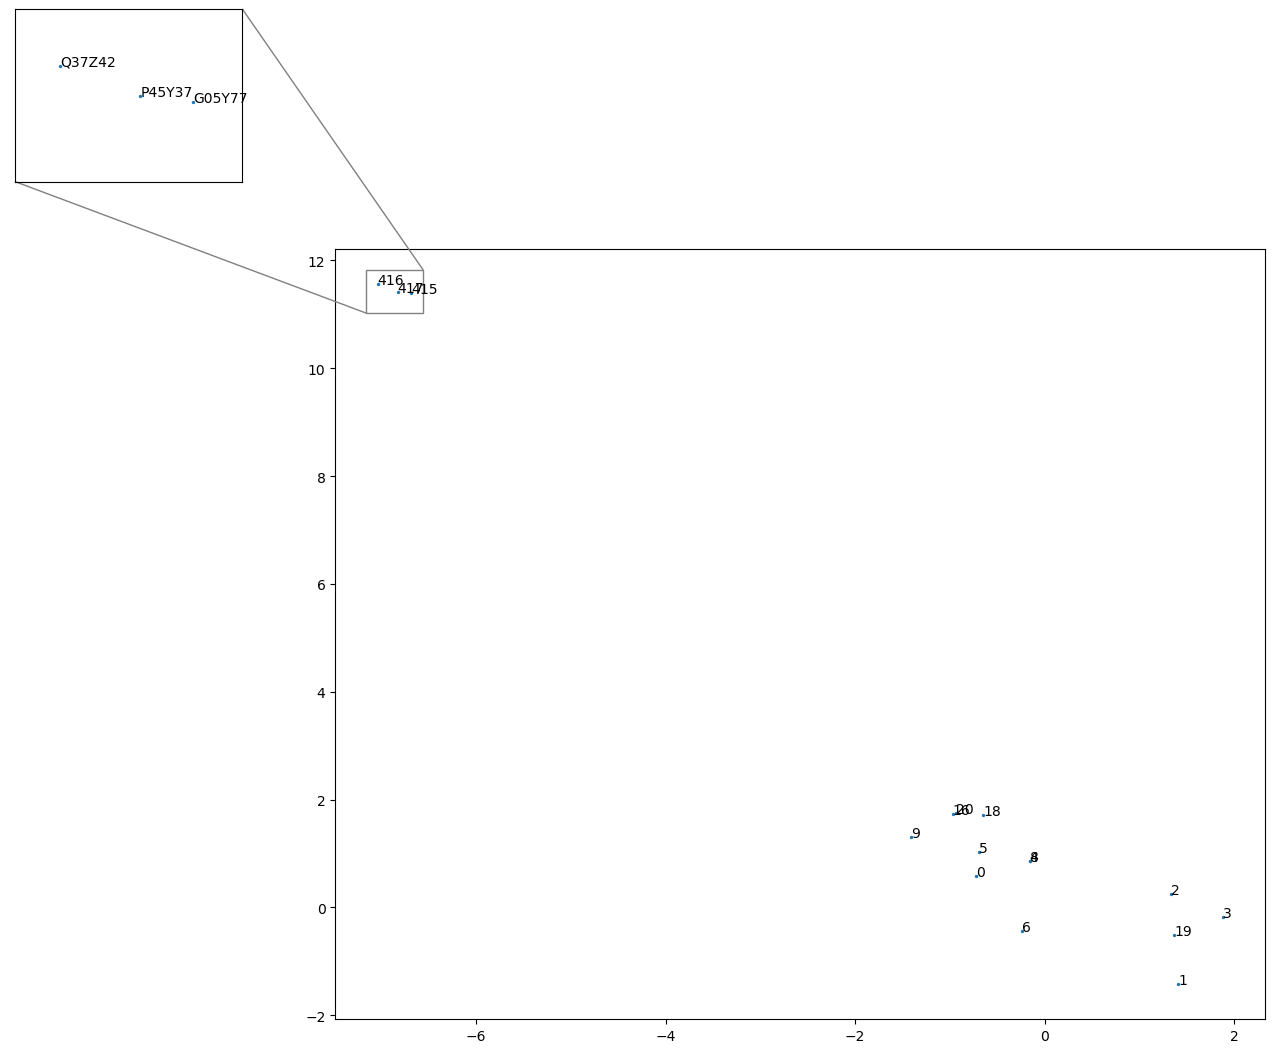

In [168]:
fig, ax = plt.subplots(figsize= (12,10))
plot_indices = [0,1,2,3,4,5,6,8,9, 16, 18, 20, 415, 416, 417, 19]
for i in plot_indices:
    ax.text(vecs[i,0], vecs[i,1],i, fontsize=10)
ax.scatter(vecs[plot_indices,0], vecs[plot_indices,1], s=2)

# Create the inset axis and plot the zoomed-in data
axins = add_zoom_inset(ax, 4, 7, vecs[-1,0], vecs[-1,1],(vecs[-1,0]-.3, vecs[-1,0]+.3), (vecs[-1,1]-.4, vecs[-1,1]+.4),borderpad=0,
    bbox_to_anchor=(-.1, 1.2), bbox_transform=ax.transAxes, mark_inset_loc=(1,3))

axins.scatter(vecs[plot_indices,0], vecs[plot_indices,1], s=2)
for i in [415, 416, 417]:
    axins.text(vecs[i,0], vecs[i,1], inv_vocab[i][1:], fontsize=10)
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)
#for i in plot_indices:
 #   axins.text(vecs[i,0], vecs[i,1], inv_vocab[i], fontsize=6)

In [92]:
vecs[np.arange(3),0]

array([-0.72633  ,  1.4088881,  1.3308036], dtype=float32)

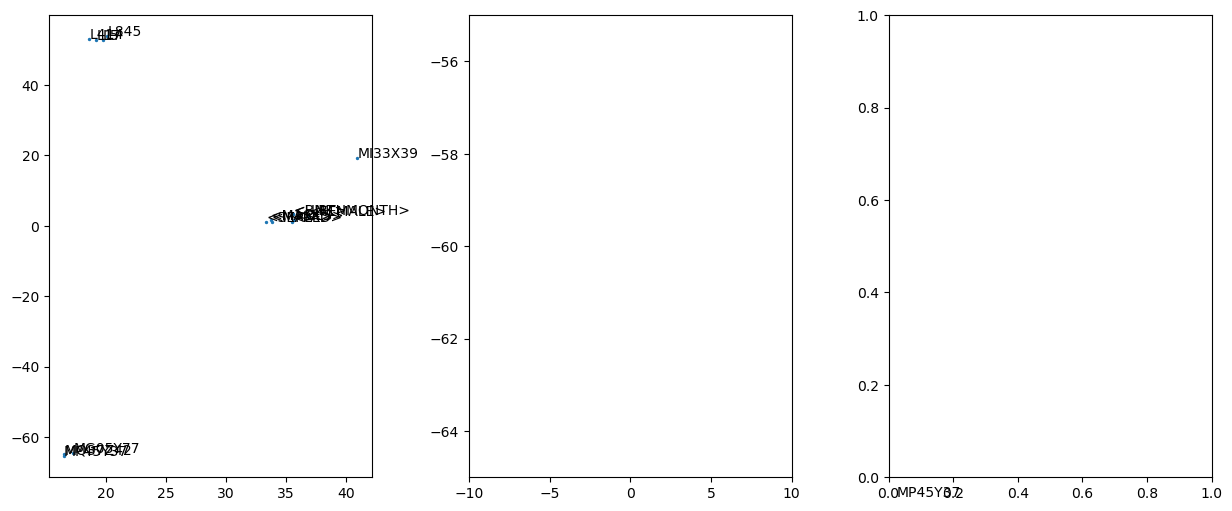

In [77]:
plot_indices = [0,1,2,3,4,5,6,8,9, 16, 18, 20, 415, 416, 417, 19]
fig, axs = plt.subplots(1,3,figsize=(15,6))
ax = axs[0]
ax.scatter(tsne_vec[plot_indices,0], tsne_vec[plot_indices,1], s=2)
for i in plot_indices:
    ax.text(tsne_vec[i,0], tsne_vec[i,1], inv_vocab[i], fontsize=10)
ax = axs[1]
plot_indices = [ 415, 416, 417]
ax.scatter(tsne_vec[plot_indices,0], tsne_vec[plot_indices,1], s=2)
for i in plot_indices:
    ax.text(tsne_vec[i,0], tsne_vec[i,1], inv_vocab[i], fontsize=10)
ax.set_xlim(-10,10)
ax.set_ylim(-65,-55)
# adjust horizontal spacing
fig.subplots_adjust(wspace=0.3)

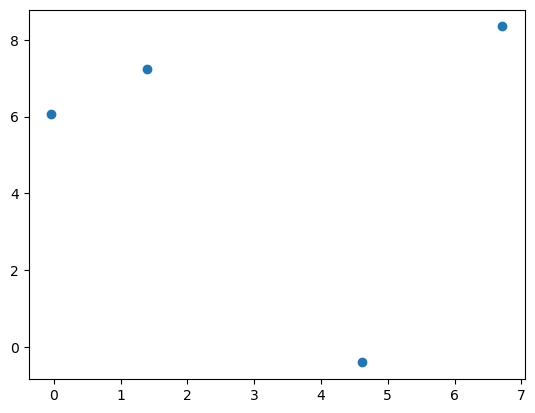

In [247]:
emb = torch.nn.Embedding(5, 2, _weight=torch.rand(5,2)*10-1)
vec = emb(torch.tensor([1,2,3,4]))
vec = vec.detach().numpy()
plt.scatter(vec[:,0], vec[:,1])

In [23]:
with open(join("..", "data", "raw", "simulated.pkl"), "rb") as f:
    data = pkl.load(f)

In [24]:
for seq in data[:2]:
    for code, mod in zip(*list(seq.values())[3:5]):
        print(code, mod)

L409 11
L80 11
MY10H46 11
DW0587 11
DU26649 12
DO92590 12
MI02T87 13
DB30123 16
L164 16
L303 16
L16 16
MX11C79 19
L776 19
L147 19
L618 19
MV97S01 20
MY06Y53 20
L901 20
DP650 22
DI080 28
DI669 28
MP76S02 28
DH91202 28
MC02H67 15
L142 16
DW9453 19
MC97Z68 19
L921 19
L205 19
L21 22
L637 22
L141 22
MH92Y37 22
MH42N18 25
MZ60R26 25
DY54993 25
L95 25
DB88128 25
L434 25
L68 26
DV32901 26
MX49A07 26
DT76335 26
MB64W49 26
L787 26
L246 26
ME57I53 26
ML09E90 26


In [186]:
p0 = data[2]
p0['birthdate']

datetime.datetime(1917, 11, 17, 0, 0)

In [187]:
p0["ages"]

[56, 56, 56, 56]

In [188]:
p0['abs_pos']

[-13206, -13199, -13188, -13173]

In [172]:
p0['visits']

[0, 1, 1, 2, 2, 2, 3, 3]

In [26]:
p0['values']

[1.0, 1.0, -0.5145988392841486, 1.0, 1.0, 1.0]

In [36]:
data = torch.load(join("..", "data", "tokenized", "simulated.pt"))

In [37]:
p0  = data[6]
p0['ages'], p0['abs_pos']

([0, 44, 44, 44, 44, 45, 45, 45, 45, 45],
 [0, -3464, -3441, -3418, -3418, -3104, -3096, -3088, -3080, -3080])

In [42]:
'abcd'.split('a')[1]

'bcd'

In [207]:
p0['values'].insert(0, 'SEP')

In [208]:
p0['values']

['SEP', 1.0, 1, 1.7111015603628703, 1, 1.0, -1.241737812151367]

In [48]:
p0

{'pid': 'p_0',
 'birthdate': datetime.datetime(1950, 8, 9, 0, 0),
 'sex': 1,
 'codes': ['LT845', 'LT446', 'M07714', 'V556', 'M61V35', 'U8331', 'Y460'],
 'ages': [0, 57, 57, 57, 57, 57, 58, 58, 58],
 'los': [0, 13, 13, 13, 13, 13, 13, 13, 13],
 'visits': [0, 1, 1, 1, 1, 1, 2, 2, 2],
 'abs_pos': [0, -887, -887, -887, -887, -887, -523, -523, -523],
 'mods': ['LAB', 'LAB', 'ICD10', 'ICD10', 'ATC', 'ICD10', 'ICD10'],
 'values': [1,
  0.5502537430336992,
  0.4261239468194264,
  1.0,
  1.0,
  1,
  1.0,
  1.0,
  1.0],
 'idx': [2, 10, 11, 12, 13, 2, 14, 15, 16],
 'top_lvl_idx': [2, 10, 11, 12, 13, 2, 14, 15, 13]}